# Global and Regional Topography & Bathymetry

![Map of altimetry of the Strait of Gibraltar](images/Bathymetry_Topography.png)

The ETOPO Global Relief Model integrates topography, bathymetry, and shoreline data from regional and global datasets to enable comprehensive, high-resolution renderings of the Earth's geophysical characteristics. It supports applications such as:
- Tsunami forecasting, modeling, and warning.
- Ocean circulation modeling.
- Earth surface visualisation.

## Data characteristics
- **Spatial resolution**: 15 arc-second latitude x 15 arc-second longitude 
- **Includes**: Berock elevation, ice surface elevation and geoid height. 
- **Granularity**: The data are divided into **15° latitude × 15° longitude** tiles. There is also one file each for bedrock elevation, ice surface elevation and geoid height. This allows data users to more easily focus on specific areas of interest.

## Useful Links

- **Dataset Landing Page**  
   https://www.ncei.noaa.gov/products/etopo-global-relief-model

- **THREDDS Catalogue**
    - Human interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.html
    - Machine interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml

## Crediting the Data Providers

When using this dataset in publications or presentations, please provide the following citation:  

> **NOAA National Centers for Environmental Information.** 2022: ETOPO 2022 15 Arc-Second Global Relief Model. NOAA National Centers for Environmental Information. DOI: 10.25921/fd45-gt74. Accessed [date].


## Exploring the data in Python

### Importing modules

In [1]:
import xarray as xr # For reading data from a NetCDF file
import matplotlib.pyplot as plt # For plotting the data
import cartopy.crs as ccrs # For plotting maps
import numpy as np # For working with arrays of data
import cmocean # Colour maps for oceanography
from siphon.catalog import TDSCatalog # For looping through the THREDDs catalogue

### Opening and understanding the data

The data have been published in a CF-NetCDF files. Whilst it is possible to directly download these data, we are not going to do that. The data are served over a THREDDs catalogue:

- Human interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.html
- Machine interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml

If you click on the human-interface above and select one of the files, you will see that the data are served over OPeNDAP. OPeNDAP provides a way of streaming data over the internet so you don't have to download them to your own computer. You can copy the OPeNDAP Data URL and use it in your script in the same way that you would use a local filepath.
  
#### One tile

Let's start by opening just a single file.

In [2]:
url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E045_surface.nc'
ds = xr.open_dataset(url)
# ds.to_netcdf('bathymetry.nc') # If you want to save the file to your computer
ds

<xarray.Dataset> Size: 52MB
Dimensions:  (lat: 3600, lon: 3600)
Coordinates:
  * lat      (lat) float64 29kB 15.0 15.01 15.01 15.01 ... 29.99 29.99 30.0
  * lon      (lon) float64 29kB 45.0 45.01 45.01 45.01 ... 59.99 59.99 60.0
Data variables:
    crs      |S64 64B ...
    z        (lat, lon) float32 52MB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929124105.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0

The data 2 dimensions, lat and lon, and a data variable z which includes the bathymetry data. Each variable has metadata associated it, and the dataset as a whole has 9 global attributes. The data are compliant with version 1.5 of the Climate & Forecast conventions: 

https://cfconventions.org/

However, the dataset lacks extensive discovery metadata, which are useful for finding and understanding the data (e.g. keywords, collection time, data providers). To improve data discovery, it would be beneficial for the data providers to include more global attributes from the Attribute Convention for Data Discovery:

https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3

#### Looping through all the tiles

We will use Python to loop through the THREDDs catalogue and read in each of the CF-NetCDF files one by one. 

Let's first provide the machine-interface to the catalogue. This is in XML format. You can paste this into your web browser to view it yourself. 

In [3]:
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml'

Within this XML file you can see the relative `urlPath` for each file. `TDSCatalog` is able to derive the OPeNDAP data access URL from the `catalog_url` above and this `urlPath`.

Let's place restrictions on which files to process using an `if` statement.

In [4]:
catalog = TDSCatalog(catalog_url)
for dataset in catalog.datasets.values():
    if dataset.name.startswith('ETOPO_2022_v1_15s_N60'): # Only data from the northern hemisphere, loading 3 tiles from N60. 
        print(dataset.name)

ETOPO_2022_v1_15s_N60E000_surface.nc
ETOPO_2022_v1_15s_N60E015_surface.nc
ETOPO_2022_v1_15s_N60E030_surface.nc
ETOPO_2022_v1_15s_N60E045_surface.nc
ETOPO_2022_v1_15s_N60E060_surface.nc
ETOPO_2022_v1_15s_N60E075_surface.nc
ETOPO_2022_v1_15s_N60E090_surface.nc
ETOPO_2022_v1_15s_N60E105_surface.nc
ETOPO_2022_v1_15s_N60E120_surface.nc
ETOPO_2022_v1_15s_N60E135_surface.nc
ETOPO_2022_v1_15s_N60E150_surface.nc
ETOPO_2022_v1_15s_N60E165_surface.nc
ETOPO_2022_v1_15s_N60W015_surface.nc
ETOPO_2022_v1_15s_N60W030_surface.nc
ETOPO_2022_v1_15s_N60W045_surface.nc
ETOPO_2022_v1_15s_N60W060_surface.nc
ETOPO_2022_v1_15s_N60W075_surface.nc
ETOPO_2022_v1_15s_N60W090_surface.nc
ETOPO_2022_v1_15s_N60W105_surface.nc
ETOPO_2022_v1_15s_N60W120_surface.nc
ETOPO_2022_v1_15s_N60W135_surface.nc
ETOPO_2022_v1_15s_N60W150_surface.nc
ETOPO_2022_v1_15s_N60W165_surface.nc
ETOPO_2022_v1_15s_N60W180_surface.nc


### Plotting bedrock bathymetry for one tile

`xarray` has inbuilt functionality to plot data. So we can quickly plot the data like this:

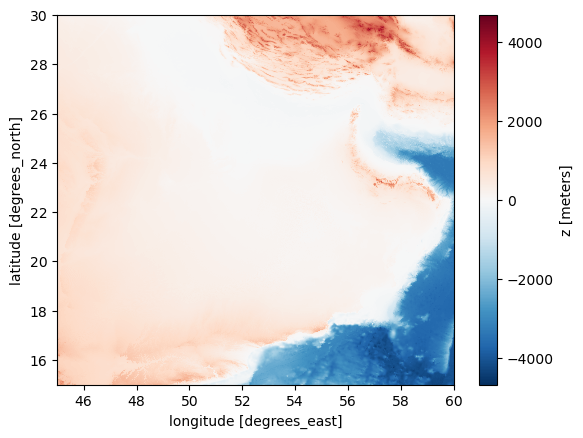

In [5]:
ds['z'].plot()
plt.show()

The data are of high resolution, which can make plotting time-consuming. To speed up the process, we can resample the data by selecting every 10th point in both latitude and longitude.

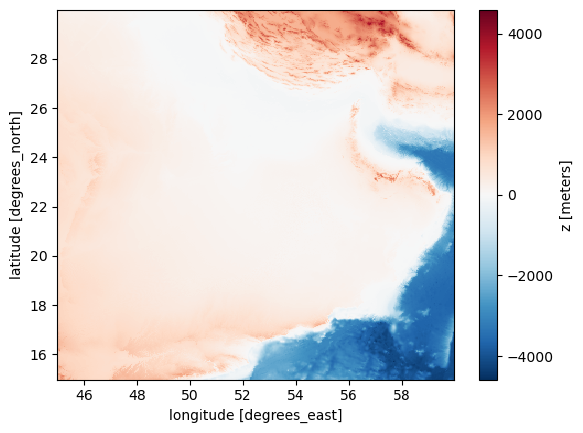

In [6]:
# Resample the data
sampling_factor = 10
ds_resampled = ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

bathymetry = ds_resampled['z']

bathymetry.plot()
plt.show()

Let's try adding a map projection. We can select one from https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

To do this, we first plot the figure and axis with the projection, and then plot the data onto that axis.

We will also need to add gridlines at the same time if we still want to see the latitude and longitude.

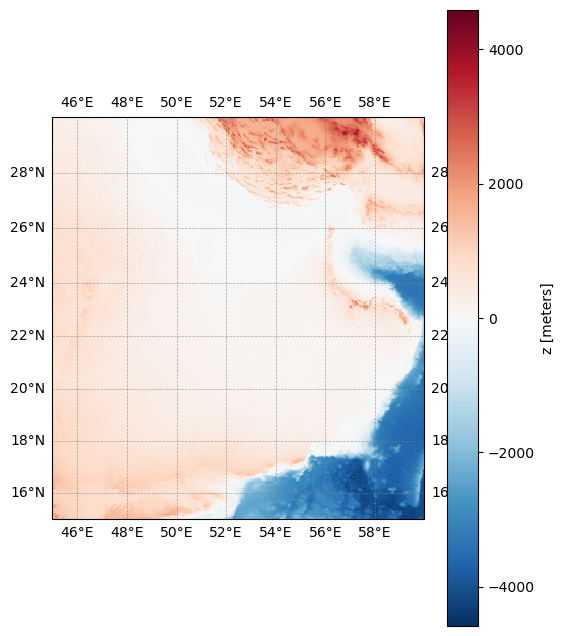

In [7]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

projection = ccrs.Mercator() # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

bathymetry = ds_resampled['z']
transform = ccrs.PlateCarree()
im = bathymetry.plot(ax=ax, transform=transform)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.show()

Let's select a different colour palette. The library `cmocean` includes a lot of different colour palettes for oceanography.

https://matplotlib.org/cmocean/

We can use `vmin` and `vmax` to provide a range for the colour palette.

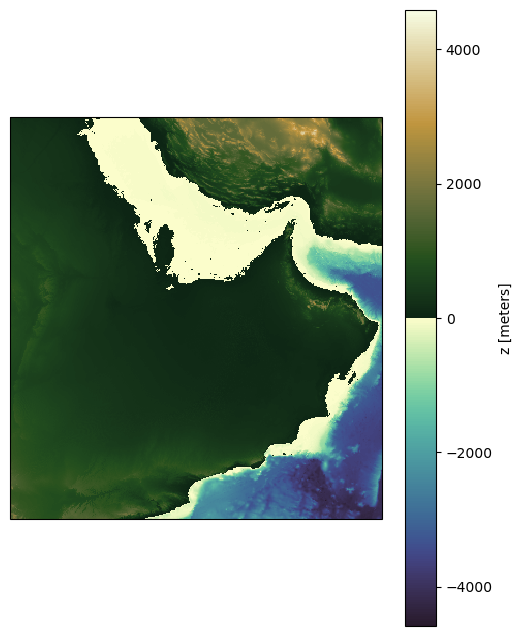

In [8]:
projection = ccrs.Mercator() # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

bathymetry = ds_resampled['z']

cmap = cmocean.cm.topo
transform = ccrs.PlateCarree()
im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform)

plt.show()

Now let's put it all together, with some final small additions to the plot.

#### Full working example

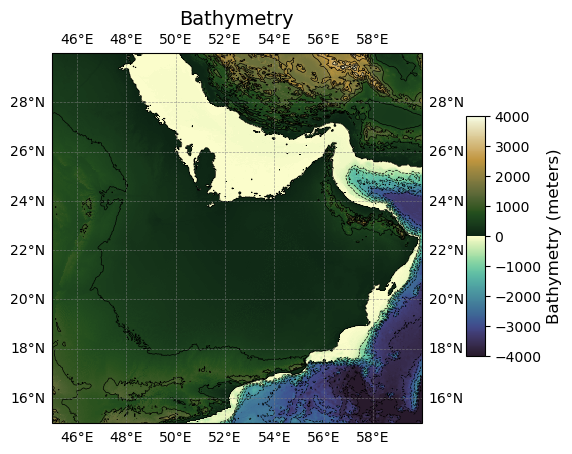

In [9]:
import xarray as xr # For reading data from a NetCDF file
import matplotlib.pyplot as plt # For plotting the data
import cartopy.crs as ccrs # For plotting maps
import numpy as np # For working with arrays of data
import cmocean # Colour maps for oceanography
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E045_surface.nc'
ds = xr.open_dataset(url)

# Resample the data
sampling_factor = 10
ds_resampled = ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

bathymetry = ds_resampled['z']

cmap = cmocean.cm.topo
vmin = -4000
vmax = 4000
transform = ccrs.PlateCarree()

# Create figure and axes
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False) # Prevent colour bar from plotting twice

# Define contour levels
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot contours
bathymetry.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                                colors='black', linewidths=0.5)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colour bar
ax.set_title('Bathymetry', fontsize=14)
    
# Add colour bar
cbar_ax = fig.add_axes([0.87, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Bathymetry (meters)', fontsize=12)

plt.show()

### Terrestrial bathymetry only

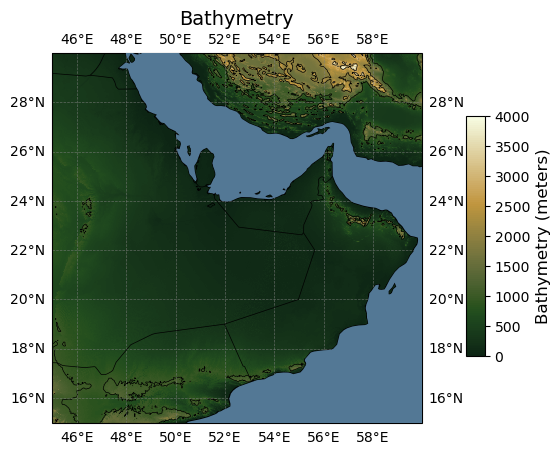

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E045_surface.nc'
ds = xr.open_dataset(url)

# Resample the data
sampling_factor = 10
ds_resampled = ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

bathymetry = ds_resampled['z']


# Use only the top half of the cmocean 'topo' colormap
topo_cmap = cmocean.cm.topo
top_half_cmap = topo_cmap(np.linspace(0.5, 1, 256))  # Extract upper half
cmap = mcolors.LinearSegmentedColormap.from_list("topo_top_half", top_half_cmap)

vmin = 0
vmax = 4000
transform = ccrs.PlateCarree()

# Create figure and axes
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the bathymetry data
im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False)

# Define contour levels
contour_interval = 1000
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)

# Plot contours for bathymetry
bathymetry.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                        colors='black', linewidths=0.5)

# Add the solid blue sea using Cartopy feature for water (ocean)
water_color = "#537895"
ax.add_feature(cfeature.OCEAN, facecolor=water_color, zorder=4)  # Solid blue ocean
ax.add_feature(cfeature.LAKES, facecolor=water_color, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.8, zorder=2)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5, zorder=3)
ax.add_feature(cfeature.RIVERS, edgecolor=water_color, linewidth=0.5, zorder=4)

# Configure gridlines
gl = ax.gridlines(crs=transform, draw_labels=True, linewidth=0.5,
                  color='gray', alpha=0.7, linestyle='--')
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colour bar
ax.set_title('Bathymetry', fontsize=14)

# Add colour bar
cbar_ax = fig.add_axes([0.87, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Bathymetry (meters)', fontsize=12)

plt.show()

### Zooming in on an area within one tile

Let's now zoom in on an area within one tile. We will use the same dataset as above.

In [11]:
min_lat = 26
max_lat = 30
min_lon = 51
max_lon = 58

bathymetry_aoi = bathymetry.sel(
    lat = slice(min_lat, max_lat),
    lon = slice(min_lon, max_lon)
)

bathymetry_aoi

<xarray.DataArray 'z' (lat: 96, lon: 168)> Size: 65kB
array([[  -3.      ,    5.884089,   10.474711, ...,  246.36987 ,  140.40364 ,
         102.6676  ],
       [  -5.      ,    1.331956,    4.363955, ...,  114.21271 ,  113.41262 ,
         177.04257 ],
       [  -5.      ,   -3.      ,   -4.      , ...,  153.08186 ,  179.09383 ,
         249.196   ],
       ...,
       [ 784.1057  ,  604.27277 ,  684.8277  , ..., 1072.2947  ,  973.2404  ,
         947.4146  ],
       [ 623.28174 ,  670.8897  ,  729.93414 , ..., 1098.2463  ,  980.0599  ,
         961.9553  ],
       [ 637.219   ,  861.9924  ,  979.87    , ..., 1131.89    , 1100.0973  ,
         911.8209  ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 768B 26.0 26.04 26.09 26.13 ... 29.88 29.92 29.96
  * lon      (lon) float64 1kB 51.0 51.04 51.09 51.13 ... 57.88 57.92 57.96
Attributes:
    long_name:      z
    grid_mapping:   crs
    units:          meters
    positive:       up
    standard_name:  height
    vert_crs_name:  EGM2008
    vert_crs_epsg:  EPSG:3855
    _ChunkSizes:    [1800 1800]

Now let's plot the data in the same way that we did before

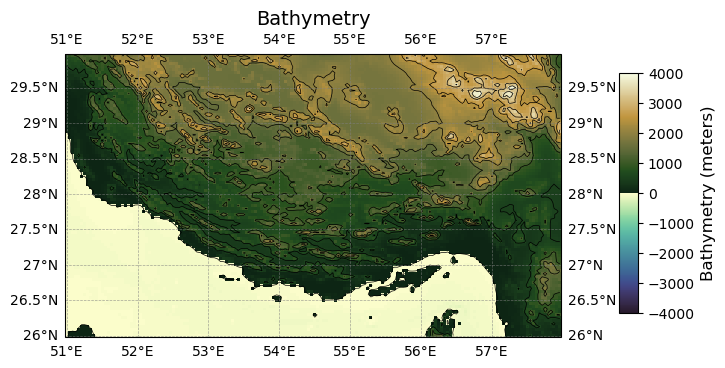

In [12]:
cmap = cmocean.cm.topo
vmin = -4000
vmax = 4000
transform = ccrs.PlateCarree()

# Create figure and axes
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
im = bathymetry_aoi.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False) # Prevent colour bar from plotting twice

# Define contour levels
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot contours
bathymetry_aoi.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                                colors='black', linewidths=0.5)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colour bar
ax.set_title('Bathymetry', fontsize=14)
    
# Add colour bar
cbar_ax = fig.add_axes([0.99, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Bathymetry (meters)', fontsize=12)

plt.show()

### Reading and plotting data from multiple tiles

We will use Python to loop through the THREDDs catalogue and read in each of the CF-NetCDF files one by one. 

Let's first provide the machine-interface to the catalogue. This is in XML format. You can paste this into your web browser to view it yourself. 

In [13]:
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml'

Within this XML file you can see the relative `urlPath` for each file. `TDSCatalog` is able to derive the OPeNDAP data access URL from the `catalog_url` above and this `urlPath`.

Let's list the OPeNDAP URLs for a couple of the files, places restrictions on which files to open using an `if` statement.

In [14]:
import xarray as xr
from siphon.catalog import TDSCatalog

# Access the catalog
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml'
catalog = TDSCatalog(catalog_url)

# Loop through the datasets and load the ones matching the criteria
for dataset in catalog.datasets.values():
    if 'ETOPO_2022_v1_15s_N30' in dataset.name:
        opendap_url = dataset.access_urls['OPENDAP']
        print(opendap_url)

https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E000_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E015_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E030_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E045_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E060_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E075_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E090_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E105_surface.nc
https://www.ngdc.noaa.go

Now let's place restrictions based on the minimum and maximum latitude and longitude that we want to plot. To do this, we have to be sure that we understand the naming convention of the files.

#### File Naming Convention
- **Fixed Prefix:** `ETOPO_2022_v1_15s_`
- **Latitude:**  
  - `NXX` → Northern Hemisphere (e.g., `N30`)  
  - `SXX` → Southern Hemisphere (e.g., `S15`)  
- **Longitude:**  
  - `EXXX` → Eastern Hemisphere (e.g., `E000`, `E120`)  
  - `WXXX` → Western Hemisphere (e.g., `W045`, `W150`)  
- **Fixed Suffix:** `_surface.nc`

#### Additional Considerations
- The latitude is the northernmost latitude included within the file.
- The longitude is the westernmost longitude included within the file.
- Each tile includes 15 x 15 degrees of data.

#### Loading in data spanning a given latitude and longitude.

In [15]:
from siphon.catalog import TDSCatalog

# Define the coordinate range
min_lat = 8
max_lat = 39
min_lon = 68
max_lon = 100

# Access the catalog
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml'
catalog = TDSCatalog(catalog_url)

# Loop through datasets and load only the relevant ones
for dataset in catalog.datasets.values():
    name_parts = dataset.name.split('_')
    
    # Extract latitude and longitude from the filename
    lat_str, lon_str = name_parts[4][:3], name_parts[4][3:]  # Example: 'N30E000' -> 'N30', 'E000'
    
    lat = int(lat_str[1:]) * (1 if lat_str[0] == 'N' else -1)
    lon = int(lon_str[1:]) * (1 if lon_str[0] == 'E' else -1)
    
    # Check if the tile falls within the bounding box
    if min_lat <= lat <= max_lat + 15 and min_lon - 15 <= lon < max_lon:
        opendap_url = dataset.access_urls['OPENDAP']
        print(opendap_url)

https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N15E060_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N15E075_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N15E090_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E060_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E075_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N30E090_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N45E060_surface.nc
https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N45E075_surface.nc
https://www.ngdc.noaa.go

Now let's use what we learned above to select only the relevant data from each tile and plot the data together in a single figure.

#### Plotting data spanning a given latitude and longitude.

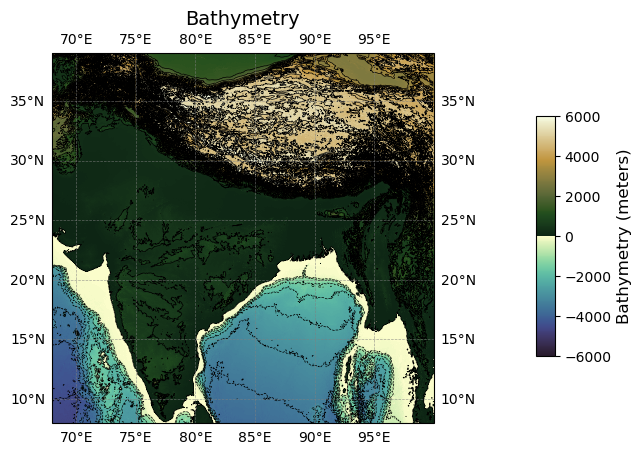

In [16]:
import xarray as xr # For reading data from a NetCDF file
import matplotlib.pyplot as plt # For plotting the data
import cartopy.crs as ccrs # For plotting maps
import numpy as np # For working with arrays of data
import cmocean # Colour maps for oceanography
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker
from siphon.catalog import TDSCatalog

# Define the coordinate range
min_lat = 8
max_lat = 39
min_lon = 68
max_lon = 100

# Variables for figure
cmap = cmocean.cm.topo
vmin = -6000
vmax = 6000
transform = ccrs.PlateCarree()

# Define contour levels
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)

# Create figure and axes
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Access the catalog
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml'
catalog = TDSCatalog(catalog_url)

# Loop through datasets and load only the relevant ones
for dataset in catalog.datasets.values():
    name_parts = dataset.name.split('_')
    
    # Extract latitude and longitude from the filename
    lat_str, lon_str = name_parts[4][:3], name_parts[4][3:]  # Example: 'N30E000' -> 'N30', 'E000'
    
    lat = int(lat_str[1:]) * (1 if lat_str[0] == 'N' else -1)
    lon = int(lon_str[1:]) * (1 if lon_str[0] == 'E' else -1)
    
    # Check if the tile falls within the bounding box
    if min_lat <= lat <= max_lat + 15 and min_lon - 15 <= lon < max_lon:
        opendap_url = dataset.access_urls['OPENDAP']

        # Loading in the data from one tile
        ds = xr.open_dataset(opendap_url)
        
        # Resample the data
        sampling_factor = 10
        ds_resampled = ds.isel(
            lat=slice(None, None, sampling_factor), # start, end and interval
            lon=slice(None, None, sampling_factor)
        )
        
        bathymetry = ds_resampled['z']

        # Select on data in the desired AOI
        bathymetry_aoi = bathymetry.sel(
            lat = slice(min_lat, max_lat),
            lon = slice(min_lon, max_lon)
        )

        # Plot image
        im = bathymetry_aoi.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False) # Prevent colour bar from plotting twice
        
        # Plot contours
        bathymetry_aoi.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                                        colors='black', linewidths=0.5)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colour bar
ax.set_title('Bathymetry', fontsize=14)
    
# Add colour bar
cbar_ax = fig.add_axes([0.97, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Bathymetry (meters)', fontsize=12)

plt.show()

### Combining xarray objects

It is also possible to combined xarray objects and plot them. Please be aware that if the datasets are large this can use quite a lot of memory.

In [17]:
import xarray as xr
from siphon.catalog import TDSCatalog

# Access the catalog
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml'
catalog = TDSCatalog(catalog_url)

# Initialise an empty list to store the datasets
datasets = []

# Define the coordinate range
min_lat = 8
max_lat = 39
min_lon = 68
max_lon = 100

# Loop through datasets and load only the relevant ones
for dataset in catalog.datasets.values():
    name_parts = dataset.name.split('_')
    
    # Extract latitude and longitude from the filename
    lat_str, lon_str = name_parts[4][:3], name_parts[4][3:]  # Example: 'N30E000' -> 'N30', 'E000'
    
    lat = int(lat_str[1:]) * (1 if lat_str[0] == 'N' else -1)
    lon = int(lon_str[1:]) * (1 if lon_str[0] == 'E' else -1)
    
    # Check if the tile falls within the bounding box
    if min_lat <= lat <= max_lat + 15 and min_lon - 15 <= lon < max_lon:
        opendap_url = dataset.access_urls['OPENDAP']

        # Loading in the data from one tile
        ds = xr.open_dataset(opendap_url)
        # Resample the data
        sampling_factor = 10
        ds_resampled = ds.isel(
            lat=slice(None, None, sampling_factor), # start, end and interval
            lon=slice(None, None, sampling_factor)
        )
        datasets.append(ds_resampled)

# Combine the datasets along the longitude dimension
combined_ds = xr.combine_by_coords(datasets, combine_attrs='drop_conflicts')
combined_ds

<xarray.Dataset> Size: 79MB
Dimensions:  (lon: 1080, lat: 1080)
Coordinates:
  * lat      (lat) float64 9kB 0.002083 0.04375 0.08542 ... 44.88 44.92 44.96
  * lon      (lon) float64 9kB 60.0 60.04 60.09 60.13 ... 104.9 104.9 105.0
Data variables:
    crs      (lon, lat) |S64 75MB b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    z        (lat, lon) float32 5MB -4.563e+03 -4.586e+03 ... 1.287e+03
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0

If we want to plot these data, we need to ensure that the data are first sorted as they should be.

In [18]:
combined_ds_sorted = combined_ds.sortby(['lat', 'lon'])

And then plotting the data...

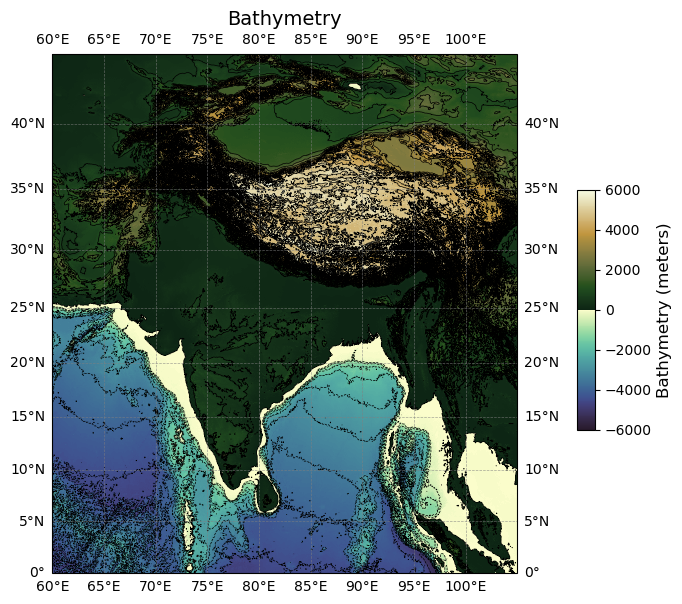

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

projection = ccrs.Mercator()
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

bathymetry = combined_ds_sorted['z']

cmap = cmocean.cm.topo
vmin = -6000
vmax = 6000
transform = ccrs.PlateCarree()
im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False) # Prevent colour bar from plotting twice

# Define contour levels
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot contours
bathymetry.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                                colors='black', linewidths=0.5)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colour bar
ax.set_title('Bathymetry', fontsize=14)
    
# Add colour bar
cbar_ax = fig.add_axes([1.00, 0.35, 0.03, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Bathymetry (meters)', fontsize=12)

plt.show()

### Writing the data to CSV

If at any stage you want to write your xarray object to a CSV file, you can.

First, write the dataframe to a pandas dataframe.

In [20]:
df = ds['z'].to_dataframe()
df.head()

z
lat       lon                   
30.002083 90.002083  5585.461914
          90.006250  5558.247559
          90.010417  5514.377930
          90.014583  5488.830566
          90.018750  5430.857910

Or

In [21]:
df = bathymetry.to_dataframe()
df.head()

z
lat      lon              
0.002083 60.002083 -4563.0
         60.043750 -4586.0
         60.085417 -4647.0
         60.127083 -4744.0
         60.168750 -4753.0

To write the pandas dataframe to a CSV file:

In [22]:
df.to_csv('bathymetry.csv')

### Interactive 3D plots

Let's now create a 3D bathymetry plot that you can rotate, zoom in on, and see the bathymetry at any point.

We are going to focus on a small region around the Strait of Gibraltar. So first let's load in the relevant tile and extract a subset of the data around our area of interest.

In [23]:
url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N45W015_surface.nc'
xrds = xr.open_dataset(url)
xrds_sub = xrds.sel(lat=slice(34, 38), lon=slice(-7, -3))
xrds_sub

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 960, lon: 960)
Coordinates:
  * lat      (lat) float64 8kB 34.0 34.01 34.01 34.01 ... 37.99 37.99 37.99 38.0
  * lon      (lon) float64 8kB -6.998 -6.994 -6.99 ... -3.01 -3.006 -3.002
Data variables:
    crs      |S64 64B ...
    z        (lat, lon) float32 4MB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929124558.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0

`lat` and `lon` are both 1D arrays. However, for this we need 2D arrays to correspond to our 2D `z` variable.

In [24]:
# Extract the data arrays from the xarray object
lat = xrds_sub['lat'].values   # 1D array of latitudes
lon = xrds_sub['lon'].values   # 1D array of longitudes
z   = xrds_sub['z'].values     # 2D array of elevation values (negative = sea, positive = land)

# Create a 2D meshgrid matching the spatial layout of your data
lon2d, lat2d = np.meshgrid(lon, lat)

Now let's create a our 3D, interactive figure.

#### Full working example

> **Note**: These interactive figures can be quite large and cause your notebook to be quite slow and laggy. If you are working on a large region, consider downsampling first as discussed earlier.

In [1]:
import numpy as np
import plotly.graph_objects as go
import xarray as xr

url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N45W015_surface.nc'
xrds = xr.open_dataset(url)

# Select an interesting region – here we use the Strait of Gibraltar,
# (Adjust these boundaries if necessary.)
xrds_sub = xrds.sel(lat=slice(35, 37), lon=slice(-6, -4))

# Extract the data arrays from the xarray object
lat = xrds_sub['lat'].values   # 1D array of latitudes
lon = xrds_sub['lon'].values   # 1D array of longitudes
z   = xrds_sub['z'].values     # 2D array of elevation values (negative = sea, positive = land)

# Create a 2D meshgrid matching the spatial layout of your data
lon2d, lat2d = np.meshgrid(lon, lat)

# Define a custom diverging colourscale that emphasises the transition at sea level.
# Compute the normalised position of sea level (0 m) within the data range.
zmin, zmax = z.min(), z.max()
mid = (0 - zmin) / (zmax - zmin)
# The colours below sea level (blue hues) and above (green to brown) are defined.
custom_colorscale = [
    [0.0, 'navy'],          # Deepest water
    [mid, 'deepskyblue'],    # Transition within the water column
    [mid, 'lightgreen'],     # Land just above sea level
    [1.0, 'saddlebrown']     # Highest elevations
]

# Create the interactive 3D surface plot with enhanced lighting and contours
fig = go.Figure(data=[go.Surface(
    x=lon2d,
    y=lat2d,
    z=z,
    colorscale=custom_colorscale,
    colorbar=dict(title='Elevation (m)'),
    lighting=dict(ambient=0.8, diffuse=0.5, specular=0.2, roughness=0.9),
    contours={
        "z": {
            "show": True,
            "usecolormap": True,
            "highlightcolor": "limegreen",
            "project": {"z": True}
        }
    }
)])

# Update the layout to improve the visual appeal
fig.update_layout(
    title=dict(
        text="3D Bathymetry and Topography: Strait of Gibraltar",
        x=0.5,
        xanchor='center',  # Corrected spelling
        font=dict(size=24)
    ),
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Elevation (m)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.7)),
        aspectratio=dict(x=1, y=1, z=0.2)
    ),
    width=900,   # Increase width
    height=600    # Increase height
)

# Display the interactive plot – you can zoom, pan and rotate to examine details
#fig.show() 

# I need to include this line, and the cell below, to make the plot display in this jupyter book.
# This is not neccessary in a jupyter notebook or your python script - just uncomment the fig.show() line above.
fig.write_html("interactive_plot_bathymetry.html")


In [2]:
from IPython.display import IFrame

# Embed the saved interactive_plot.html
IFrame('interactive_plot_bathymetry.html', width=900, height=600)

### Antarctic and Greenland bathymetry: bedrock and ice surface

![Greenland and Antarctica bedrock bathymetry](images/Greenland_Antarctica_bedrock_bathymetry.png)

The ETOPO Global Relief Model also includes bedrock elevation bathymetry data for both Greenland and Antarctica.

- **THREDDS Catalogue**
    - Human interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.html
    - Machine interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.xml

The data are structured in the same way as the surface bathymetry data so we can use them in exactly the same way.

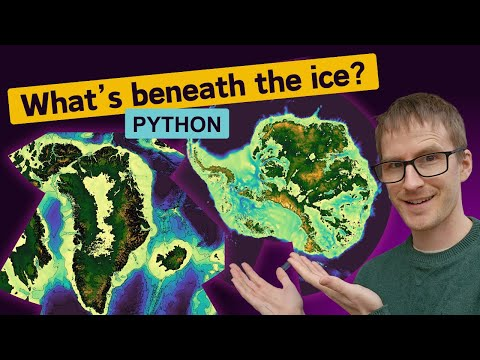

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('o860xid_bDA') # video id

#### Plotting the bedrock bathymetry for one tile

In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

def plot_bathymetry(url, cmap, vmin, vmax, projection=ccrs.Mercator(), sampling_factor=10, 
                    contour_interval=500, title='Bathymetry', 
                    colorbar_label='Bathymetry (meters)', figsize=(6, 8)):
    """
    Parameters:
    url (str): URL or path to the NetCDF file.
    cmap: Matplotlib or cmocean colormap for the plot.
    vmin, vmax (int/float): Minimum and maximum elevation for the colour scale.
    projection: Cartopy projection for the map.
    sampling_factor (int): Factor to downsample the data for faster plotting.
    contour_interval (int): Interval for contour lines.
    title (str): Title of the plot.
    colorbar_label (str): Label for the colour bar.
    figsize (tuple): Size of the figure.
    """
    # Load the dataset
    ds = xr.open_dataset(url)

    # Resample the data
    sampling_factor = 10
    ds_resampled = ds.isel(
        lat=slice(None, None, sampling_factor), # start, end and interval
        lon=slice(None, None, sampling_factor)
    )

    bathymetry = ds_resampled['z']

    transform = ccrs.PlateCarree()

    # Create a figure and axis
    fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=figsize)

    # Define contour levels
    contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)

    # Plot the data
    im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False)

    # Plot contours
    bathymetry.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                                      colors='black', linewidths=0.5)

    # Configure gridlines
    gl = ax.gridlines(
        crs=transform, draw_labels=True, linewidth=0.5,
        color='gray', alpha=0.7, linestyle='--'
    )
    gl.ylocator = mticker.AutoLocator()
    gl.xlocator = mticker.AutoLocator()
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    # Add title and colour bar
    ax.set_title(title, fontsize=14)
    
    # Add colour bar
    cbar_ax = fig.add_axes([0.87, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label(colorbar_label, fontsize=12)

    plt.show()

Let's execute this function now.

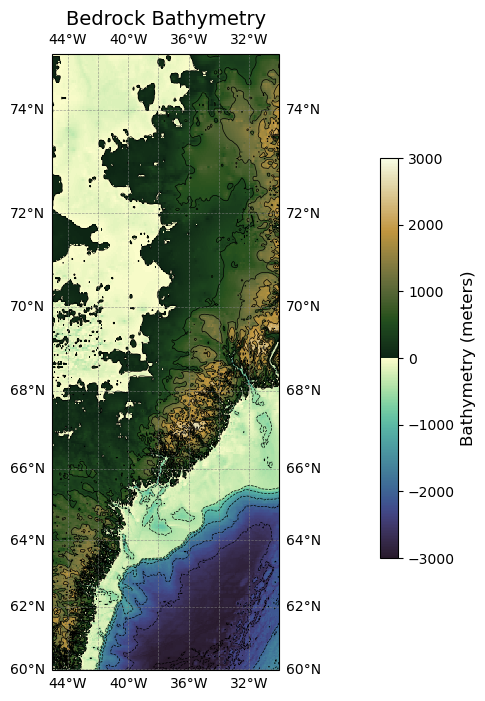

In [28]:
plot_bathymetry(
    url='https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc',
    cmap=cmocean.cm.topo,
    vmin=-3000,
    vmax=3000,
    title='Bedrock Bathymetry'
)

#### Plotting ice surface elevation for one tile

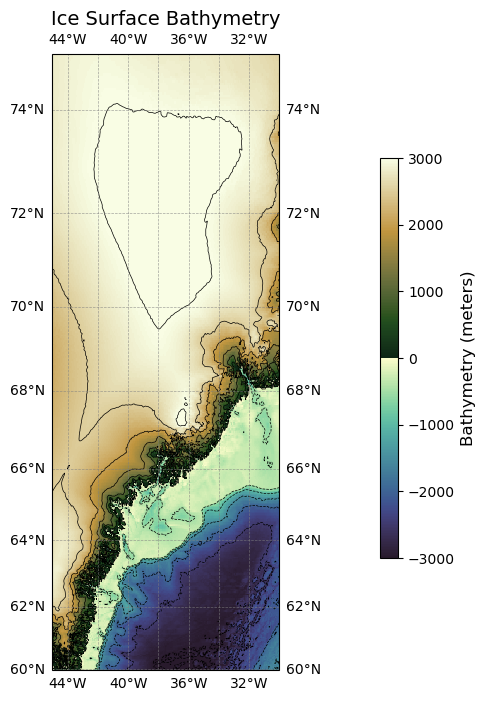

In [29]:
plot_bathymetry(
    url='https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N75W045_surface.nc',
    cmap=cmocean.cm.topo,
    vmin=-3000,
    vmax=3000,
    title='Ice Surface Bathymetry'
)

#### Computing the ice thickness

In [30]:
sampling_factor = 10

bedrock_bathymetry_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc'
bedrock_bathymetry_ds = xr.open_dataset(bedrock_bathymetry_url)

# Resample the data
bedrock_bathymetry_ds_resampled = bedrock_bathymetry_ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

ice_surface_bathymetry_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N75W045_surface.nc'
ice_surface_bathymetry_ds = xr.open_dataset(ice_surface_bathymetry_url)

# Resample the data
ice_surface_bathymetry_ds_resampled = ice_surface_bathymetry_ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

# Computing the ice thickness
bedrock_bathymetry = bedrock_bathymetry_ds_resampled['z']
ice_surface_bathymetry = ice_surface_bathymetry_ds_resampled['z']

ice_thickness = ice_surface_bathymetry - bedrock_bathymetry
ice_thickness

<xarray.DataArray 'z' (lat: 360, lon: 360)> Size: 518kB
array([[ 9.9922180e-02,  8.3898926e-01, -1.7539978e-01, ...,
         3.4909668e+00,  1.1684570e+00,  1.5560547e+01],
       [ 2.2317200e+00,  2.8958511e-01,  6.4606094e+00, ...,
         1.0388184e+00, -4.2647095e+01, -1.2547363e+01],
       [ 2.0805550e+00,  1.9022884e+00,  4.6504974e-01, ...,
        -7.9223633e+00, -2.4365234e-01,  8.6613770e+00],
       ...,
       [ 2.7466025e+03,  2.7564221e+03,  2.7592844e+03, ...,
         1.9250111e+03,  1.9044199e+03,  1.8757640e+03],
       [ 2.7624097e+03,  2.7782856e+03,  2.7909805e+03, ...,
         2.0261189e+03,  2.0201501e+03,  2.0176443e+03],
       [ 2.8904727e+03,  2.8913271e+03,  2.8670420e+03, ...,
         2.0913994e+03,  2.0910613e+03,  2.0849414e+03]], dtype=float32)
Coordinates:
  * lat      (lat) float64 3kB 60.0 60.04 60.09 60.13 ... 74.88 74.92 74.96
  * lon      (lon) float64 3kB -45.0 -44.96 -44.91 ... -30.12 -30.08 -30.04

Now let's plot the ice thickness data on a map.

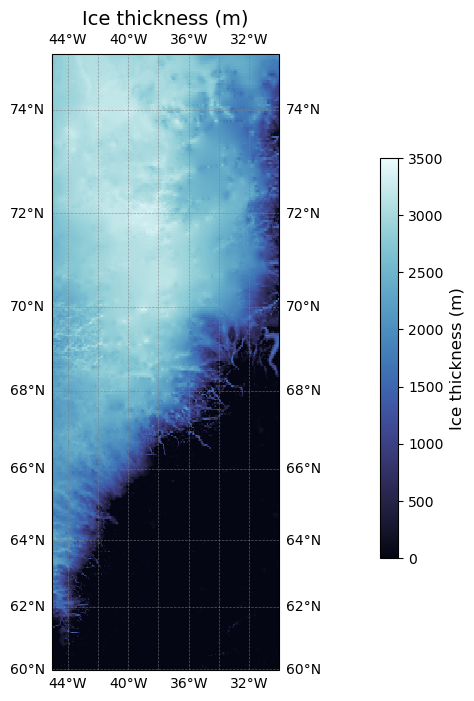

In [31]:
projection = ccrs.Mercator() # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

transform = ccrs.PlateCarree()
im = ice_thickness.plot(cmap=cmocean.cm.ice, ax=ax, transform=transform, vmin=0, vmax=3500, add_colorbar = False)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add colour bar
cbar_ax = fig.add_axes([0.87, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Ice thickness (m)', fontsize=12)

# Add title and colour bar
ax.set_title('Ice thickness (m)', fontsize=14)

plt.show()


#### Plotting the data for all of Greenland

Processing dataset 1: ETOPO_2022_v1_15s_N60W030_bed.nc
Processing dataset 2: ETOPO_2022_v1_15s_N60W045_bed.nc
Processing dataset 3: ETOPO_2022_v1_15s_N60W060_bed.nc
Processing dataset 4: ETOPO_2022_v1_15s_N75W015_bed.nc
Processing dataset 5: ETOPO_2022_v1_15s_N75W030_bed.nc
Processing dataset 6: ETOPO_2022_v1_15s_N75W045_bed.nc
Processing dataset 7: ETOPO_2022_v1_15s_N75W060_bed.nc
Processing dataset 8: ETOPO_2022_v1_15s_N75W075_bed.nc
Processing dataset 9: ETOPO_2022_v1_15s_N90E000_bed.nc
No data in the specified range for this file.
Processing dataset 10: ETOPO_2022_v1_15s_N90W015_bed.nc
Processing dataset 11: ETOPO_2022_v1_15s_N90W030_bed.nc
Processing dataset 12: ETOPO_2022_v1_15s_N90W045_bed.nc
Processing dataset 13: ETOPO_2022_v1_15s_N90W060_bed.nc
Processing dataset 14: ETOPO_2022_v1_15s_N90W075_bed.nc
Processing dataset 15: ETOPO_2022_v1_15s_N90W090_bed.nc
Processing dataset 16: ETOPO_2022_v1_15s_N90W105_bed.nc
No data in the specified range for this file.


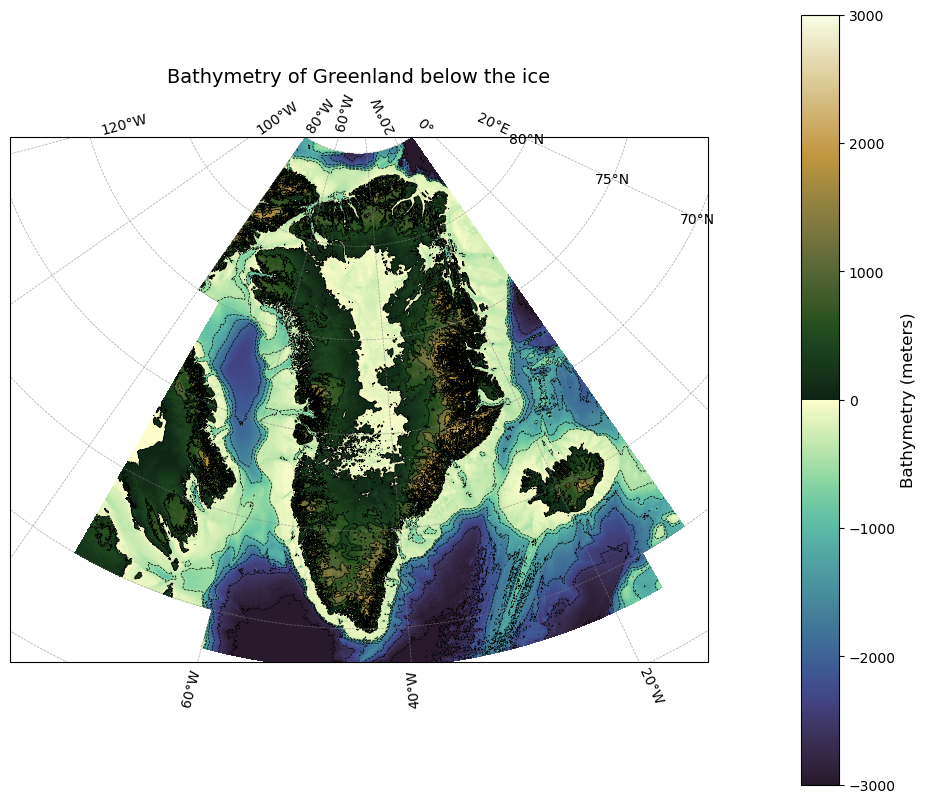

In [32]:
#!/usr/bin/env python3
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from siphon.catalog import TDSCatalog
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

# Set up the map projection
projection = ccrs.NorthPolarStereo(central_longitude=-45)
transform = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(12, 10))

# Geospatial range to plot
# Set to 'False' to plot full range of the data, or provide a value
zoom = True
if zoom is True:
    lat_min = 58
    lat_max = 85
    lon_min = -80
    lon_max = -10
else:
    lat_min = None
    lat_max = None
    lon_min = None
    lon_max = None

# Initialising values
computed_lat_min = float('inf')
computed_lat_max = float('-inf')
computed_lon_min = float('inf')
computed_lon_max = float('-inf')

# Elevation range for colour scale
vmax = 3000
vmin = vmax * -1
# Contour interval
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot only every nth sample in both lat and lon to speed up processing
sampling_factor = 10

# Traversing the THREDDS server
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.xml'

# Access the THREDDS catalog
catalog = TDSCatalog(catalog_url)

n = 0
for dataset in catalog.datasets.values():
    if 'ETOPO_2022_v1_15s_N' in dataset.name:
        n += 1
        print(f"Processing dataset {n}: {dataset.name}")
        ds = xr.open_dataset(dataset.access_urls['OPENDAP'])
        bathymetry = ds['z']
        bathymetry_resampled = bathymetry.isel(
            lat=slice(None, None, sampling_factor),
            lon=slice(None, None, sampling_factor)
        )

        if zoom == True:
            # Selecting data only within geospatial limits specified
            bathymetry_resampled = bathymetry_resampled.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
            if bathymetry_resampled.size == 0:
                print("No data in the specified range for this file.")
                continue  # Skip this file and move to the next one

        # Update the global lat_min, lat_max, lon_min, lon_max across all files
        if zoom is False:
            computed_lat_min = min(computed_lat_min, bathymetry_resampled.coords['lat'].min().values)
            computed_lat_max = max(computed_lat_max, bathymetry_resampled.coords['lat'].max().values)
            computed_lon_min = min(computed_lon_min, bathymetry_resampled.coords['lon'].min().values)
            computed_lon_max = max(computed_lon_max, bathymetry_resampled.coords['lon'].max().values)

        # Plot the data
        im = bathymetry_resampled.plot(
            cmap=cmocean.cm.topo, vmin=vmin, vmax=vmax,
            ax=ax, transform=transform, add_colorbar=False
        )
        # Plot contours
        bathymetry_resampled.plot.contour(
            ax=ax, levels=contour_levels, colors='black',
            linewidths=0.5, transform=transform
        )

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Clip the map to the data extent
if zoom is False:
    lat_min = computed_lat_min
    lat_max = computed_lat_max
    lon_min = computed_lon_min
    lon_max = computed_lon_max
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=transform)

# Add title and colorbar
ax.set_title('Bathymetry of Greenland below the ice', fontsize=14)
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Bathymetry (meters)', fontsize=12)

# Save the plot
plt.savefig('greenland.png', dpi=500)

# Show the plot
plt.show()

#### Plotting the data for all of Antarctica

Processing dataset 1: ETOPO_2022_v1_15s_S60E000_bed.nc
Processing dataset 2: ETOPO_2022_v1_15s_S60E015_bed.nc
Processing dataset 3: ETOPO_2022_v1_15s_S60E030_bed.nc
Processing dataset 4: ETOPO_2022_v1_15s_S60E045_bed.nc
Processing dataset 5: ETOPO_2022_v1_15s_S60E060_bed.nc
Processing dataset 6: ETOPO_2022_v1_15s_S60E075_bed.nc
Processing dataset 7: ETOPO_2022_v1_15s_S60E090_bed.nc
Processing dataset 8: ETOPO_2022_v1_15s_S60E105_bed.nc
Processing dataset 9: ETOPO_2022_v1_15s_S60E120_bed.nc
Processing dataset 10: ETOPO_2022_v1_15s_S60E135_bed.nc
Processing dataset 11: ETOPO_2022_v1_15s_S60E150_bed.nc
Processing dataset 12: ETOPO_2022_v1_15s_S60E165_bed.nc
Processing dataset 13: ETOPO_2022_v1_15s_S60W015_bed.nc
Processing dataset 14: ETOPO_2022_v1_15s_S60W030_bed.nc
Processing dataset 15: ETOPO_2022_v1_15s_S60W045_bed.nc
Processing dataset 16: ETOPO_2022_v1_15s_S60W060_bed.nc
Processing dataset 17: ETOPO_2022_v1_15s_S60W075_bed.nc
Processing dataset 18: ETOPO_2022_v1_15s_S60W090_bed.nc
P

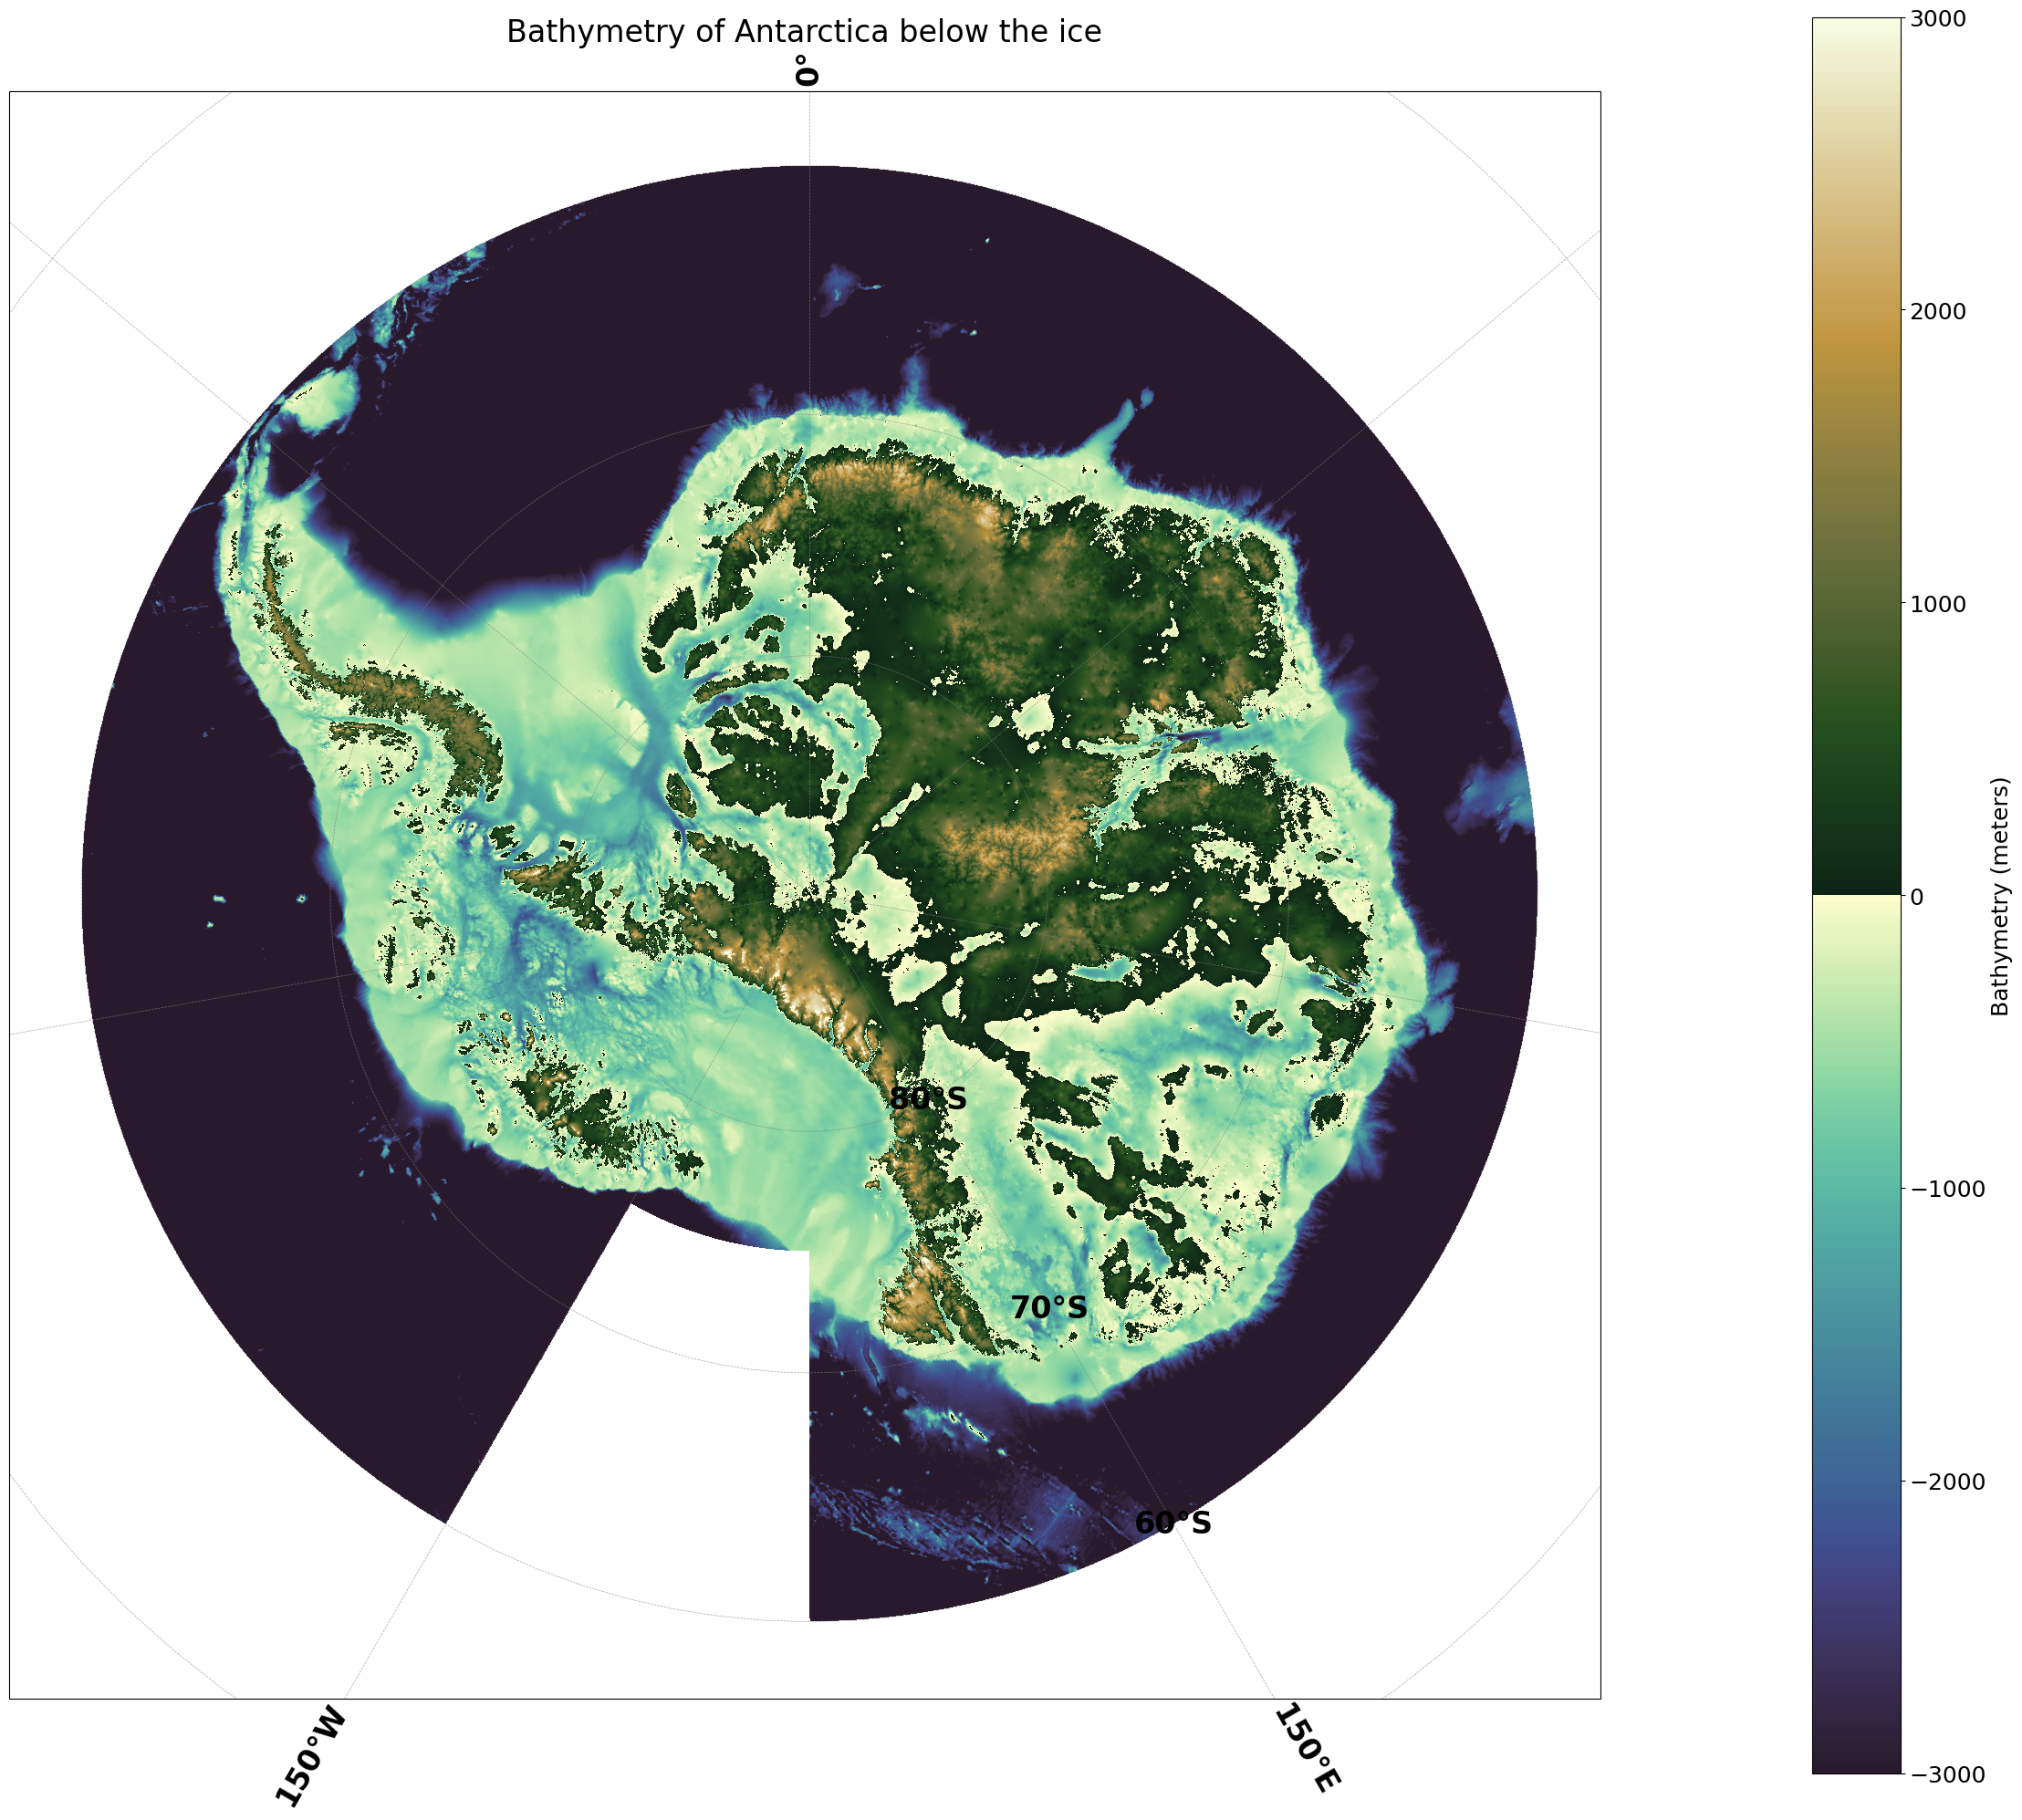

In [33]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from siphon.catalog import TDSCatalog
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

# Setting up the figure and related variables

# Set up the map projection (you can choose a different projection if needed)
projection = ccrs.SouthPolarStereo()
transform = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(30, 25))

# Geospatial range to plot
# Full range
lat_min = -90
lat_max = -57
lon_min = -180
lon_max = 180
# Zoom
# lat_min = -80
# lat_max = -70
# lon_min = 0
# lon_max = 60

# Elevation range for colour scale
vmax = 3000
vmin = vmax * -1
# Contour interval
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot only every nth sample in both lat and lon to speed up processing
sampling_factor = 10

# Traversing the THREDDS server
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.xml'

# Access the THREDDS catalog
catalog = TDSCatalog(catalog_url)

# Traverse through the catalog and print a list of the NetCDF files
datasets_filenames = catalog.datasets

# Traverse through the catalog and print URLs of the NetCDF files
datasets_urls = []
for dataset in catalog.datasets.values():
    datasets_urls.append(dataset.access_urls['OPENDAP'])

n=0
for dataset in catalog.datasets.values():
    if 'ETOPO_2022_v1_15s_S' in dataset.name:
        n=n+1
        print(f"Processing dataset {n}: {dataset.name}")
        ds = xr.open_dataset(dataset.access_urls['OPENDAP'])
        bathymetry = ds['z']

        # Select every nth sample for faster resampling
        bathymetry_resampled = bathymetry.isel(
            lat=slice(None, None, sampling_factor),
            lon=slice(None, None, sampling_factor)
        )

        # Selecting data only within geospatial limits specified
        bathymetry_resampled = bathymetry_resampled.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        if bathymetry_resampled.size == 0:
            print("No data in the specified range for this file.")
            continue  # Skip this file and move to the next one

        # Plot tile
        im =  bathymetry_resampled.plot(cmap=cmocean.cm.topo, vmin=vmin, vmax=vmax, ax=ax, transform=transform, add_colorbar=False)
        # Plot contours
        bathymetry_resampled.plot.contour(levels=contour_levels, colors='black', linewidths=0.1)

# Add labels, title, colorbar, etc. as needed
ax.set_title('Bathymetry of Antarctica below the ice', fontsize=24)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 24, 'color': 'black', 'weight':'bold'}
gl.ylabel_style = {'size': 24, 'color': 'black', 'weight':'bold'}

ax.set_extent([lon_min, lon_max, lat_min, lat_max], transform)

# Create a single colorbar for both plots
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Bathymetry (meters)', fontsize=18)
cbar.ax.tick_params(labelsize=18)

# Show the plot
plt.savefig('antarctica.png', dpi=500)

plt.show()